In [31]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import datetime
import my_tools as mt


df_cases_daily = mt.read_csv('cases_daily', 'daily cases')
df_cases_total = mt.read_csv('cases_total','Total cases')
df_cases_weekly = mt.read_csv('cases_weekly', 'weekly cases')
df_cases_3days = mt.read_csv('cases_3days', '3days av cases')

df_deaths_daily = mt.read_csv('deaths_daily', 'daily deaths')
df_deaths_total = mt.read_csv('deaths_total', 'Total deaths')
df_deaths_weekly = mt.read_csv('deaths_weekly', 'New deaths weekly')

df_prevalence = mt.read_csv('prevalence', 'Prevalence')
df_incidence_daily = mt.read_csv('incidence_daily', 'Daily incidence')
df_incidence_weekly = mt.read_csv('incidence_weekly', 'Weekly incidence')
df_incidence_3days = mt.read_csv('incidence_3days', '3days av incidence')
df_mortality = mt.read_csv('mortality', 'Mortality')

df_global = mt.read_csv('global', 'Global data')

df_thresholds = pd.read_csv('../data/thresholds.csv').set_index('ind')

countries = df_cases_daily.columns
dates = df_cases_daily.index
dates_weekly = df_cases_weekly.index
dates_3days = df_cases_3days.index

latest_date = dates[-1]

In [55]:
def threshold_data(df, subj, per, countries=countries, reset=True):
    if per == 'daily':
        per = ''
    else:
        per = '_' + per
    
    d = {}

    for country in countries:
        start_date = df_thresholds.at[subj, country]

        allowed_dates = df.index[df.index >= start_date]
        allowed_dates = allowed_dates[[date in eval('dates' + per) for date in allowed_dates]]
        mask = [date in allowed_dates for date in df.index]
        
        country_data = df.loc[mask][country]
        if reset: 
            country_data = country_data.reset_index(drop=True)
            
        d[country] = country_data

    df_new = pd.DataFrame(d)

    return df_new

In [60]:
threshold_data(df_prevalence, 'cases', 'weekly', ['Belgium', 'China'], reset=True)

,Belgium,China
0,0.000015,1.550911e-07
1,0.000060,1.427412e-06
2,0.000246,1.033869e-05
3,0.000800,2.673311e-05
4,0.001614,4.923137e-05
5,NaN,5.529859e-05
6,NaN,5.739016e-05
7,NaN,5.802560e-05
8,NaN,5.815556e-05
9,NaN,5.840759e-05


In [18]:
def plot_spread(subject, countries=[], scale='lin', days=0):
    sizes = (17, 6)
    
    if days == 0:
        days = len(df_cases_daily)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    label1 = ''
    label2 = ''
    
    if subject == 'incidence_daily':
        df1 = df_incidence_daily
        df2 = df_prevalence
        
        title1 = 'Incidence (daily cases / population)'
        title2 = 'Prevalence (total cases / population)'
        
        per = 'daily'
    elif subject == 'incidence_weekly':
        df1 = df_incidence_weekly
        df2 = df_prevalence
        
        title1 = 'Incidence (weekly cases / population)'
        title2 = 'Prevalence (total cases / population)'
        
        per = 'weekly'
    elif subject == 'incidence_3days':
        df1 = df_incidence_3days
        df2 = df_prevalence
        
        title1 = 'Incidence (3day av. cases / population)'
        title2 = 'Prevalence (total cases / population)'
        
        per = '3days'
    else:
        df1 = eval('df_cases_' + subject)
        df2 = eval('df_deaths_' + subject)
        
        title1 = subject.capitalize() + ' cases'
        title2 = subject.capitalize() + ' deaths'
        
        per = subject
        if subject == 'total':
            per = 'daily'
    
    if scale == 'lin':
        if countries:
            df1[countries].tail(days).plot(figsize=sizes, ax=ax1)
            df2[countries].tail(days).plot(figsize=sizes, ax=ax2, legend=False)
            ax1.legend(frameon=False, loc='upper left')
        else: 
            df1.tail(days).plot(figsize=sizes, ax=ax1, legend=False)
            df2.tail(days).plot(figsize=sizes, ax=ax2, legend=False)   
            
    elif scale == 'log':
        title1 = title1 + ' (log scale + normalizing translation)'
        title2 = title2 + ' (log scale + normalizing translation)'
        
        label1 = 'Days since 100 cases'
        label2 = 'Days since 10 deaths'
        
        if subject in ['daily', 'total', 'incidence_daily']:
            per = 'daily'
        elif subject in ['3days', 'incidence_3days']:
            per = '3days'
        else:
            per = 'weekly'
        
        df1 = mt.threshold_data(df1, 'cases', per)
        df2 = mt.threshold_data(df2, 'deaths', per)
        
        
        if countries:
            df1[countries].dropna(axis=0, how='all').plot(figsize=sizes, ax=ax1, legend=False)
            df2[countries].dropna(axis=0, how='all').plot(figsize=sizes, ax=ax2)
            ax2.legend(frameon=False, loc='lower right')
        else: 
            df1.tail(days).plot(figsize=sizes, ax=ax1, legend=False)
            df2.tail(days).plot(figsize=sizes, ax=ax2, legend=False)
        
        ax1.set_yscale('log')
        ax1.set_ylim(ymin=100)
        ax2.set_yscale('log')
        ax2.set_ylim(ymin=10)
            
    ax1.set_title(title1)
    ax1.set_xlabel(label1)
    ax2.set_title(title2)
    ax2.set_xlabel(label2)

    plt.show()

In [19]:
countries_of_interest = ['China', 'France', 'Italy', 'United States of America', 'Spain', 
                         'United Kingdom', 'Belgium', 'Iran', 'Ukraine', 'South Korea']


countries_of_interest.sort()

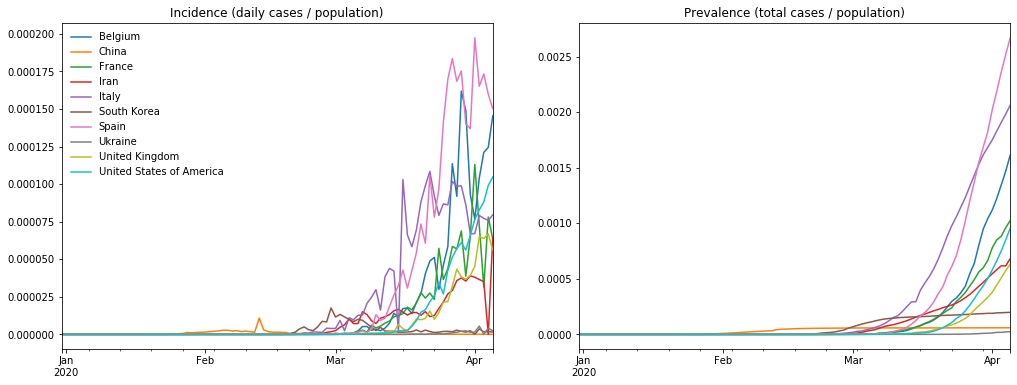

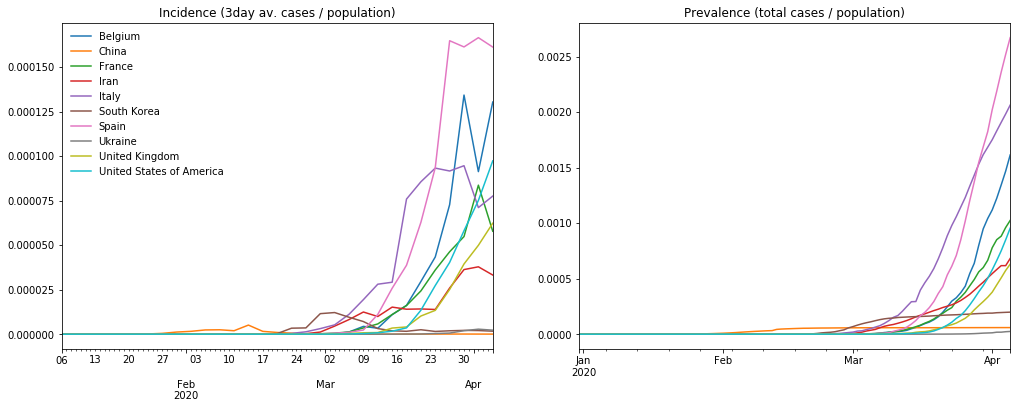

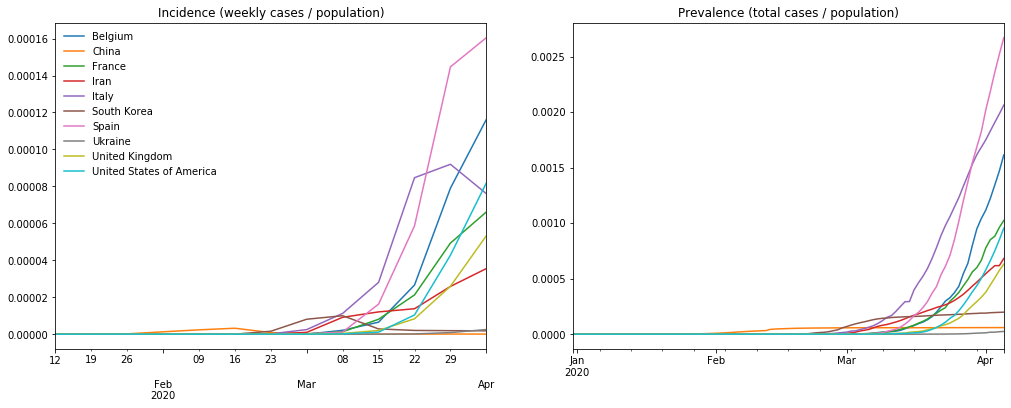

In [20]:
plot_spread('incidence_daily', countries_of_interest)
plot_spread('incidence_3days', countries_of_interest)
plot_spread('incidence_weekly', countries_of_interest)

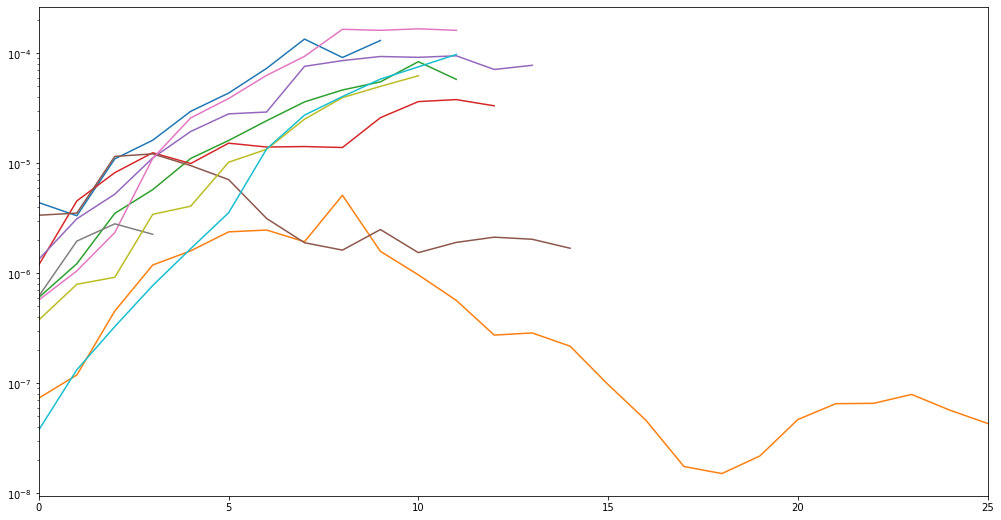

In [38]:
df2 = mt.threshold_data(df_incidence_3days, 'cases', '3days')

df2[countries_of_interest].dropna(axis=0, how='all').plot(figsize=(17,9), legend=False)
plt.yscale('log')

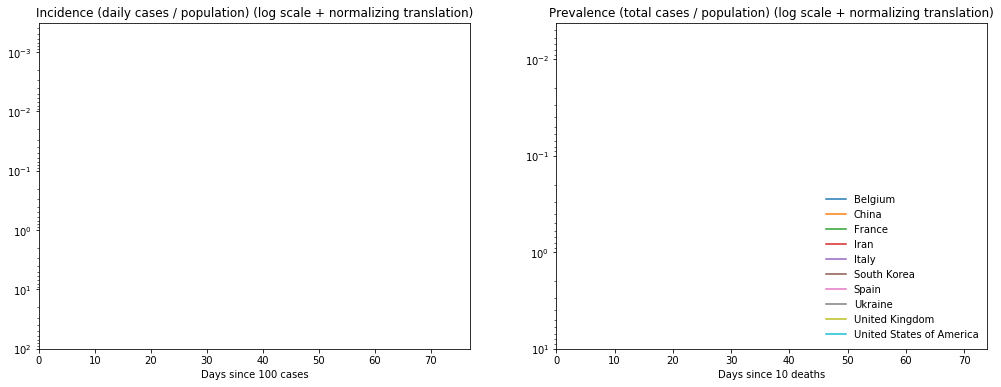

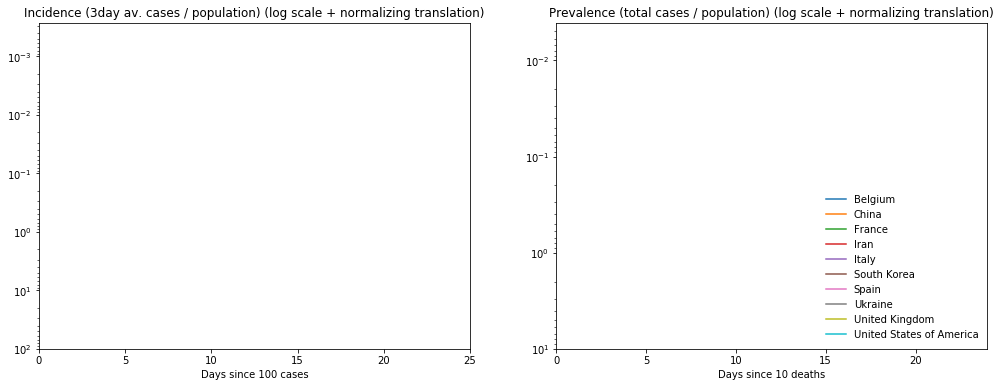

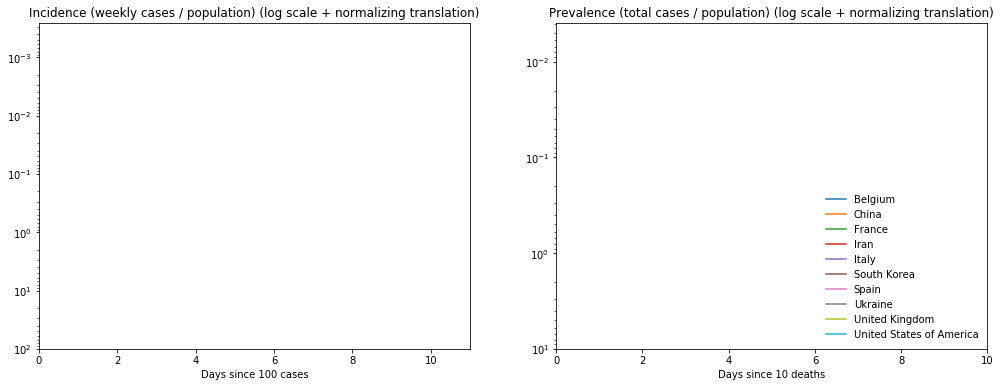

In [21]:
plot_spread('incidence_daily', countries_of_interest, scale='log')
plot_spread('incidence_3days', countries_of_interest, scale='log')
plot_spread('incidence_weekly', countries_of_interest, scale='log')